In [1]:
import pandas as pd
import numpy as np
from scipy.stats import beta, norm, binom
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Math
from IPython import display
import time

---
Instant Headline Testing
=====
***

#####ctr = click through rate
#####views = page views

####One distribution is considered better on the basis of drawing a large number of random samples from each and evaluating the proportion that are greater than the other

In [2]:
def percent_better(a, b, a1, b1, the_size):
    '''This determines which headline is better, by generating a number of random samples from each of the 
    headline distributions. The proportion of the number of random samples that are greater are reported as
    a percentage win for that distribution and headline'''
    
    #randomly sample from the first distribution
    ra = beta.rvs(a, b, size = the_size)
    
    #randomly sample from the second distribution
    rb = beta.rvs(a1, b1, size = the_size)
    
    #This returns the number of the random variables from ra that execeed rb
    return sum(ra >= rb) / float(the_size)

#####This is what sum(ra >= rb) does:
#####(ra >= rb) produces an array of booleans

In [3]:
rra = beta.rvs(1, 2, size = 5)
print rra
rrb = beta.rvs(2, 3, size = 5)
print rrb

print (rra >= rrb)

rs = sum(rra >= rrb)
print rs

[ 0.20665816  0.79285266  0.54081374  0.40746956  0.31888347]
[ 0.20530612  0.87107141  0.74420043  0.21652022  0.19827563]
[ True False False  True  True]
3


In [4]:
def demonstrate(a_views, a_ctr, b_views, b_ctr, size):
    '''This plots the posterior distributions for each headline based upon their respective click through rates and
    page views'''
    
    fig, ax = plt.subplots(1, 1)
    fig.figsize=(15, 8)
    
    #Headline A - caclulate the a and b
    a = a_views * a_ctr;
    b = a_views * (1. - a_ctr)
    
    #Need this for plotting
    upper = beta.ppf(0.999, a, b)
    xs = np.linspace(0, upper, 200)
    
    #report results for headline A
    print "Headline A:"
    print "a_views = ", a_views
    print "a_ctr = ", a_ctr
    print "a_views * a_ctr = ", a
    print "a_views * (1. - a_ctr) = ", b
      
    #Plot the distribution for Headline A
    ax.plot(xs, beta.pdf(xs, a, b), label = "Headline A", color = 'red')
    
    #ax.hold(True)
    
    #Headline B - caclulate the a and b
    a2 = b_views * b_ctr;
    b2 = b_views * (1. - b_ctr)
    
    #Need this for plotting
    upper2 = beta.ppf(0.999, a2, b2)
    xs2 = np.linspace(0, upper2, 200)
    
    print "\nHeadline B:"
    print "b_views = ", b_views
    print "b_ctr = ", b_ctr
    print "b_views * b_ctr = ", a2
    print "b_views * (1. - b_ctr) = ", b2
    
    #Which is better headline A or headline B
    pb = percent_better(a, b, a2, b2, size)
    print "pb is ", pb
    
    #Determine winner
    if pb > 0.5:
        winner = 'A'
    else:
        winner = 'B'
        pb = 1.0 - pb
     
    #Plot the distribution for Headline B
    ax.plot(xs2, beta.pdf(xs2, a2, b2), label = "Headline B", color = 'black')

    ax.set_title('Headline %s is better in %.2f%% of the cases' % (winner, pb*100.0));
    ax.set_xlabel('CTR')
    ax.legend(loc = "upper right")

####Try changing the number of views and the CTRs for both headlines A and B, and replot

Headline A:
a_views =  100
a_ctr =  0.04969
a_views * a_ctr =  4.969
a_views * (1. - a_ctr) =  95.031

Headline B:
b_views =  200
b_ctr =  0.13287
b_views * b_ctr =  26.574
b_views * (1. - b_ctr) =  173.426
pb is  0.007729


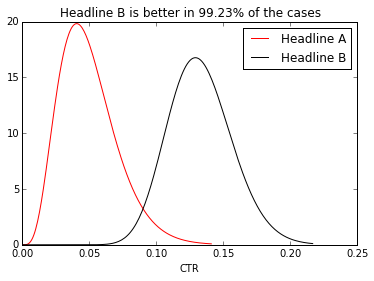

In [5]:
A_views = 100
A_ctr = 0.04969
B_views = 200
B_ctr = 0.13287
demonstrate(A_views, A_ctr, B_views, B_ctr, size=1000000)

####Increase the number of views for each headline (no change to the CTRs), and replot
####What happens to the variance of the estimates?

Headline A:
a_views =  1610
a_ctr =  0.04969
a_views * a_ctr =  80.0009
a_views * (1. - a_ctr) =  1529.9991

Headline B:
b_views =  1430
b_ctr =  0.13287
b_views * b_ctr =  190.0041
b_views * (1. - b_ctr) =  1239.9959
pb is  0.0


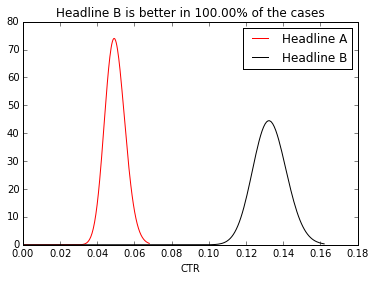

In [6]:
A_views = 1610
B_views = 1430
demonstrate(A_views, A_ctr, B_views, B_ctr, size=1000000)

In [7]:
def demonstrate_live(a_views, a_ctr, b_views, b_ctr, size, ax):
    '''Similar to the above function, except this manages re-drawing the plots for an animated demo'''
    
    #clear the axes
    plt.cla()
    
    #clear the output area
    display.clear_output(wait=True)
    
    #headline A
    a = a_views * a_ctr;
    b = a_views * (1. - a_ctr)
    
    #for plotting
    upper = beta.ppf(0.999, a, b)
    #xsa = np.linspace(0, upper, 200)

    
    #headline B
    a2 = b_views * b_ctr;
    b2 = b_views * (1. - b_ctr)
    
    #for plotting
    upper2 = beta.ppf(0.999, a2, b2)
    #xsb = np.linspace(0, upper2, 200)
    
    #find the largest x value for plotting purposes
    if upper > upper2:
        max_upper = upper
    else:
        max_upper = upper2

    #is headline A or headline B 'better'    
    pb = percent_better(a, b, a2, b2, size)
    
    #Assign the winner
    if pb > 0.5:
        winner = 'A'
    else:
        winner = 'B'
        pb = 1.0 - pb
    
    #for plotting
    xs = np.linspace(0, max_upper, 400)

    ax.set_title('Headline %s is better in %.2f%% of the cases' % (winner, pb*100.0));
    ax.set_xlabel('CTR')
    
    #put useful information into the legends
    s = "A views = {:d}, ctr = {:0.3f}".format(int(a_views), a_ctr)
    s2 = "B views = {:d}, ctr = {:0.3f}".format(int(b_views), b_ctr)
    
    #plot headline A
    ax.plot(xs, beta.pdf(xs, a, b), label = s, color = 'red')
    
    #plot headline B
    ax.plot(xs, beta.pdf(xs, a2, b2), label = s2, color = 'black')
    
    ax.legend(loc='upper right')
    
    #display the plot
    display.display(plt.gcf())

####Animated Demo of Instant Headline Testing using Anscombe's Boundary

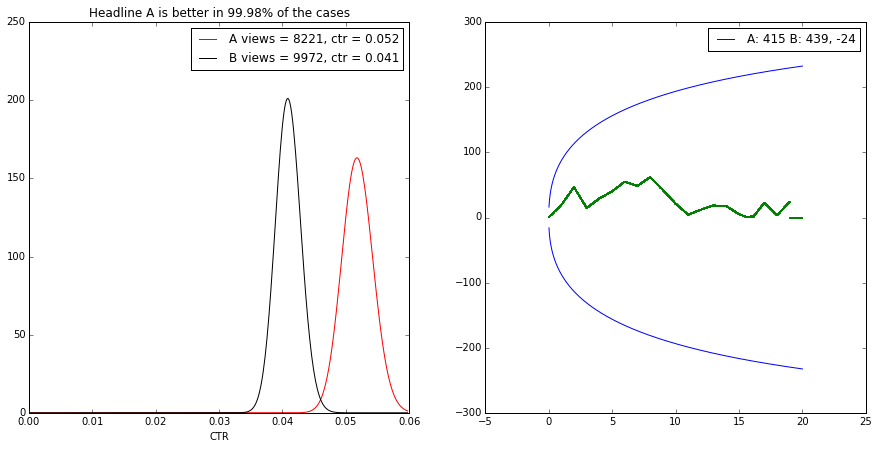

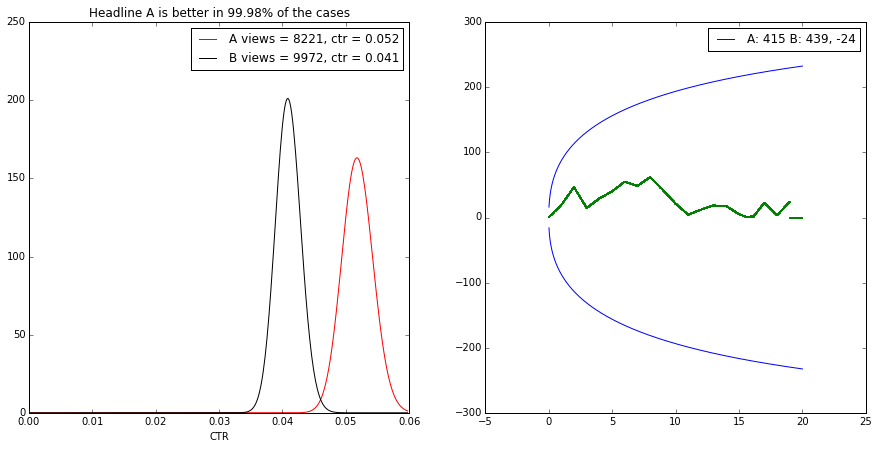

In [9]:
fig = plt.figure(figsize = (15, 7))

#Assume we will get roughly this many views per minute
views_per_minute = 1000

#The duration of Anscombe's Boundary test
total_duration = 20

#The total number of views we expect to see during the test
total_n = total_duration * views_per_minute

#Let's set up the boundary by assuming we will display the winner for 6 hours after the test concludes
additional_serving_time = 360

#This is the total addition views we would expect
additional_views = additional_serving_time * views_per_minute
#This sets up our k value
k = additional_views

#n increases as the test is conducted, as people view the headlines
n = np.linspace(0.0, total_n, total_duration*60)

#Anscombe's Formula
rr = -norm.ppf((n/(k + (2.0 * n)))) * np.sqrt(n)

#For plotting purposes - assume 20 minutes
x_plot_ans = np.linspace(0, total_duration, total_duration*60)

#This is the number of random samples to use to determine the winner - headline A or B
size = 10000

#Initialize the test
b_views = 0
a_views = 0
a_clicks = 0
b_clicks = 0

#Let's skew the CTR's so we get a result
a_ctr = 0.05
b_ctr = 0.03

#This will hold the absolute difference between the number of click throughs for A and B
click_diff = np.zeros(20*60)

#Let's assume we run the test for 20 minutes, but that each iteration represents seconds
for i in xrange(total_duration*60):   
    
    #get between 10 and 1000 new page views per minute
    #change the new page views every minute
    if i % 60 == 0:
        new_page_views_for_a = np.random.randint(low = 10, high = 1000, size = 1)
        new_page_views_for_a /= 60.0
    
    #accumulate the total number of pages views for headline A
    a_views += new_page_views_for_a
    
    #every minute re-alter the CTR, but again skew it in A's favor
    if i % 60 == 0:
        a_ctr = np.random.uniform(0.049, 0.052)    
    
    #for headline B
    if i % 60 == 0:
        new_page_views_for_b = np.random.randint(low = 10, high = 1000, size = 1)
        new_page_views_for_b /= 60.0
    b_views += new_page_views_for_b
    if i % 60 == 0:
        b_ctr = np.random.uniform(0.038, 0.049)
        
    #set up to plot 2 graphs
    ax = plt.subplot(121)
    
    if i % 60 == 0:
        #up date the plot once a minute
        demonstrate_live(a_views, a_ctr, b_views, b_ctr, size, ax)
    
    #calclate the absolute difference between the click throughs for A and B
    a_clicks += new_page_views_for_a * a_ctr
    b_clicks += new_page_views_for_b * b_ctr
    
    #Take the absolute value
    click_diff[i] = np.fabs(a_clicks - b_clicks)
    
    #put this information into the plot legend
    s = "A: {:d} B: {:d}, {:d}".format(int(a_clicks), int(b_clicks), int(a_clicks - b_clicks))
    
    if i % 60 == 0:
        #draw the anscombe plot
        
        ax1 = plt.subplot(122)
        plt.cla()
        display.clear_output(wait=True)   
        
        ax1.scatter(x_plot_ans, click_diff, s=1, color='green')
        ax1.plot(x_plot_ans, np.array(rr), label = s, color = 'blue')
        ax1.plot(x_plot_ans, -np.array(rr), label = None, color = 'blue')
        
        ax1.legend(loc="upper right")
    
        display.display(plt.gcf())
#         time.sleep(5)
    

####A look into the Anscombe Formula

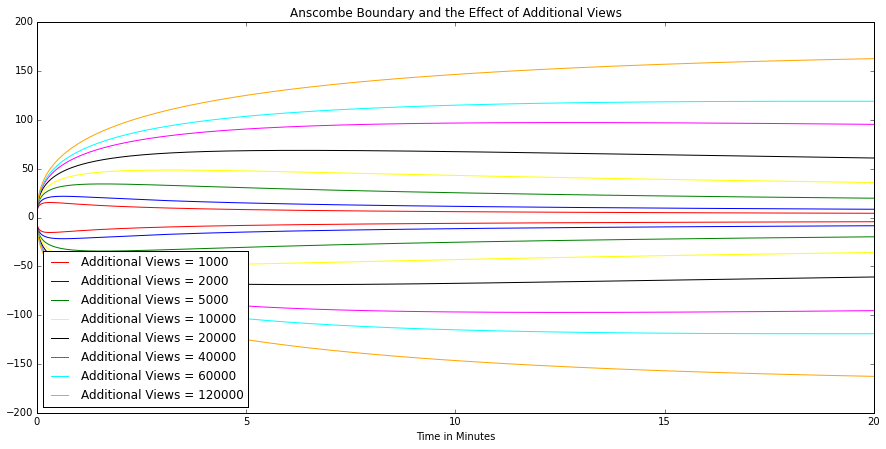

In [10]:
fig = plt.figure(figsize = (15, 7))
ax = plt.subplot(111)
ax.set_title("Anscombe Boundary and the Effect of Additional Views")
ax.set_xlabel("Time in Minutes")
#Assume we will get roughly this many views per minute
views_per_minute = 1000

#The duration of Anscombe's Boundary test
total_duration = 20

#The total number of views we expect to see during the test
total_n = total_duration * views_per_minute

#Let's set up the boundary by assuming we will display the winner for 6 hours after the test concludes
additional_serving_time = [1., 2., 5., 10., 20., 40., 60., 120.]

colors = ['red', 'blue', 'green', 'yellow', 'black', 'magenta', 'cyan', 'orange']

for i, addst in enumerate(additional_serving_time):
    
    #This is the total addition views we would expect
    additional_views = addst * views_per_minute
    #This sets up our k value
    k = additional_views

    #n increases as the test is conducted, as people view the headlines
    n = np.linspace(0.0, total_n, total_duration*60)

    #Anscombe's Formula
    rr = -norm.ppf((n/(k + (2.0 * n)))) * np.sqrt(n)

    #For plotting purposes - assume 20 minutes
    x_plot_ans = np.linspace(0, total_duration, total_duration*60)

    lstr = "Additional Views = {:d}".format(int(k))
    ax.plot(x_plot_ans, np.array(rr),  color = colors[i], label=lstr)
    ax.plot(x_plot_ans, -np.array(rr),  color = colors[i], label=None)
    ax.legend(loc="lower left")